   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


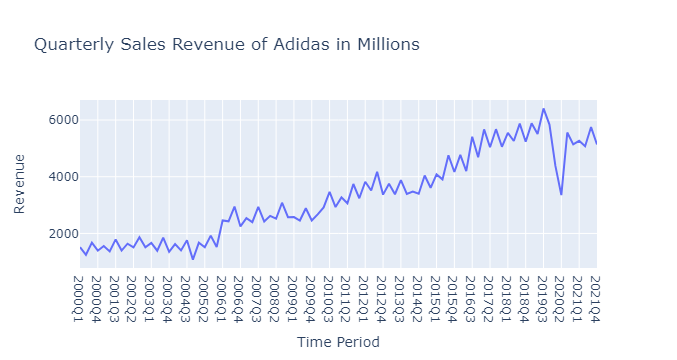

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Mon, 26 Feb 2024   AIC                           1106.564
Time:                                    19:52:27   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.544   

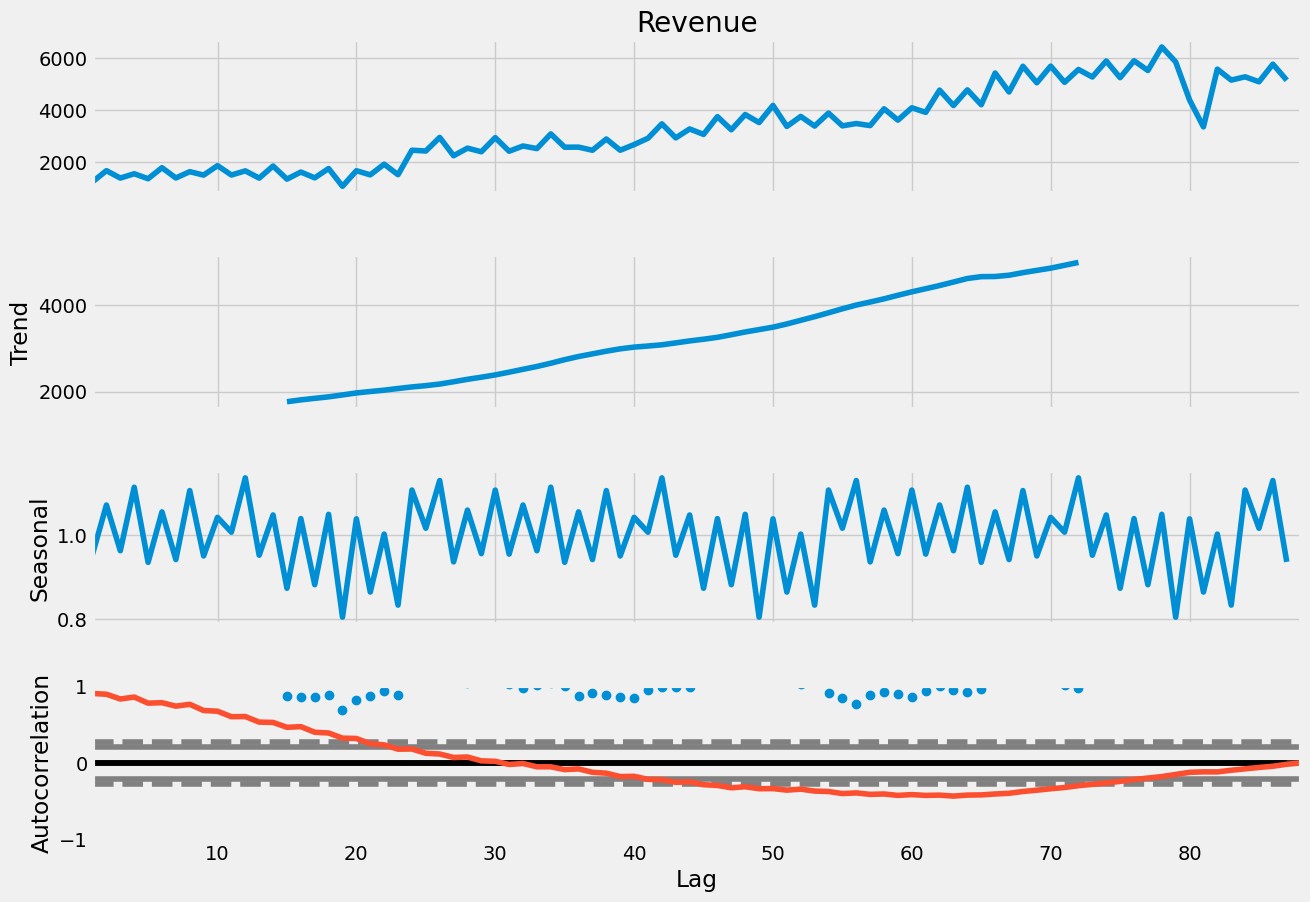

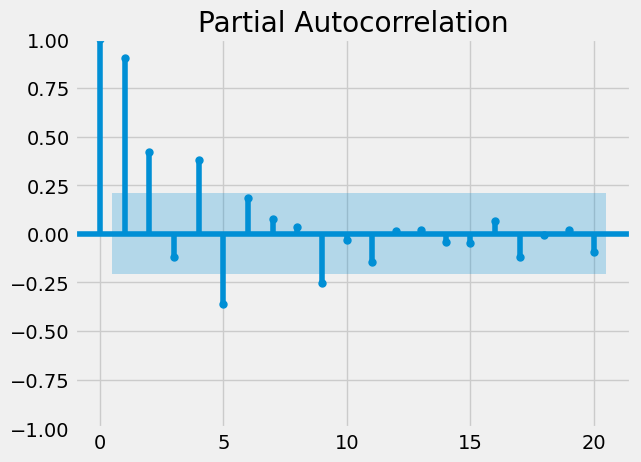

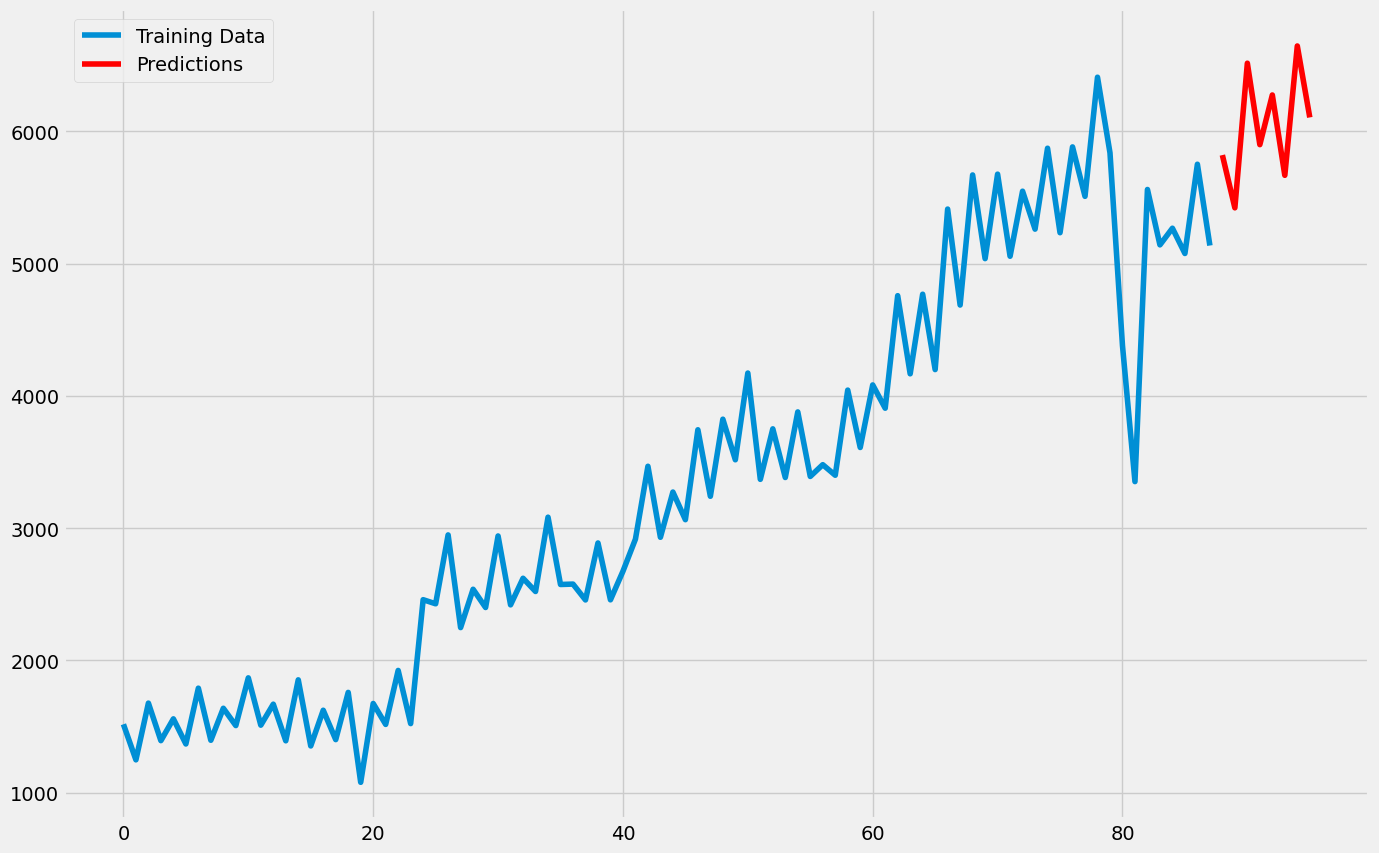

In [5]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings
import plotly.express as px

# Load your data
data = pd.read_csv("adidas-quarterly-sales.csv")
print(data)

# Visualize the data using Plotly
figure = px.line(data, x="Time Period", 
                 y="Revenue", 
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

# Seasonal Decompose
result = seasonal_decompose(data["Revenue"], model='multiplicative', period=30)
fig = result.plot()
fig.set_size_inches(15, 10)

# Autocorrelation
pd.plotting.autocorrelation_plot(data["Revenue"])

# Partial Autocorrelation
plot_pacf(data["Revenue"], lags=20)

# Define the model parameters
p = 1  # AR term
d = 1  # Differencing
q = 1  # MA term
P = 1  # Seasonal AR term
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA term
S = 12  # Seasonal period (e.g., 12 for monthly data with annual seasonality)

# SARIMAX Model
model = sm.tsa.statespace.SARIMAX(data['Revenue'],
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, S))

# Fit the model
model_fitted = model.fit()

# Print the summary
print(model_fitted.summary())

# Predictions
predictions = model_fitted.predict(start=len(data), end=len(data)+7)
print(predictions)

# Plot training data and predictions
plt.figure(figsize=(15, 10))
plt.plot(data["Revenue"], label="Training Data")
plt.plot(predictions, label="Predictions", color='red')
plt.legend()
plt.show()
